# Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, SimpleRNN, Flatten, Conv1D
from sklearn.preprocessing import MinMaxScaler

# Import dataset

In [2]:
from google.colab import drive
drive.mount('/content/driver/')

Mounted at /content/driver/


In [20]:
dataset_path = ('/content/driver/MyDrive/dataset/testbed_flat_tms.csv')
df = pd.read_csv(dataset_path)

# Detach a single OD traffic

In [21]:
od_number = 51
dataset = df.iloc[:, od_number]
dataset = dataset.astype('float32')
dataset = dataset.values
dataset = np.reshape(dataset,(-1,1))
dataset

array([[3426.],
       [9795.],
       [8665.],
       ...,
       [3146.],
       [3940.],
       [2678.]], dtype=float32)

# Data preparation

In [22]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
	    a = dataset[i:(i+look_back), 0]
	    dataX.append(a)
	    dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print("train_data_size: " + str(trainX.shape[0]), " test_data_size: " + str(testX.shape[0]))

train_data_size: 4994  test_data_size: 1241


# Build models

In [23]:
vanilla_lstm = Sequential()
vanilla_lstm.add(LSTM(100, input_dim=look_back, activation="relu"))
vanilla_lstm.add(Dense(1))
vanilla_lstm.compile(loss='mean_squared_error', optimizer='adam')

vanilla_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               44400     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 44,501
Trainable params: 44,501
Non-trainable params: 0
_________________________________________________________________


In [24]:
simple_rnn_model = Sequential()
simple_rnn_model.add(SimpleRNN(100, input_dim=look_back, activation="relu"))
simple_rnn_model.add(Dense(1))
simple_rnn_model.compile(loss='mean_squared_error', optimizer='adam')

simple_rnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 100)               11100     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 11,201
Trainable params: 11,201
Non-trainable params: 0
_________________________________________________________________


# Feed data into models

In [25]:
vanilla_lstm.fit(trainX, trainY, epochs=200, batch_size=32, verbose=2,validation_split=0.3)

Epoch 1/200
110/110 - 3s - loss: 0.0910 - val_loss: 0.0379 - 3s/epoch - 29ms/step
Epoch 2/200
110/110 - 1s - loss: 0.0300 - val_loss: 0.0270 - 1s/epoch - 9ms/step
Epoch 3/200
110/110 - 1s - loss: 0.0246 - val_loss: 0.0223 - 801ms/epoch - 7ms/step
Epoch 4/200
110/110 - 1s - loss: 0.0220 - val_loss: 0.0200 - 628ms/epoch - 6ms/step
Epoch 5/200
110/110 - 1s - loss: 0.0201 - val_loss: 0.0204 - 574ms/epoch - 5ms/step
Epoch 6/200
110/110 - 1s - loss: 0.0181 - val_loss: 0.0162 - 576ms/epoch - 5ms/step
Epoch 7/200
110/110 - 1s - loss: 0.0159 - val_loss: 0.0150 - 586ms/epoch - 5ms/step
Epoch 8/200
110/110 - 1s - loss: 0.0146 - val_loss: 0.0131 - 577ms/epoch - 5ms/step
Epoch 9/200
110/110 - 1s - loss: 0.0135 - val_loss: 0.0121 - 643ms/epoch - 6ms/step
Epoch 10/200
110/110 - 1s - loss: 0.0125 - val_loss: 0.0118 - 579ms/epoch - 5ms/step
Epoch 11/200
110/110 - 1s - loss: 0.0117 - val_loss: 0.0109 - 657ms/epoch - 6ms/step
Epoch 12/200
110/110 - 1s - loss: 0.0109 - val_loss: 0.0101 - 648ms/epoch - 6ms

In [26]:
simple_rnn_model.fit(trainX, trainY, epochs=200, batch_size=32, verbose=2,validation_split=0.3)

Epoch 1/200
110/110 - 2s - loss: 0.0580 - val_loss: 0.0250 - 2s/epoch - 18ms/step
Epoch 2/200
110/110 - 0s - loss: 0.0222 - val_loss: 0.0189 - 478ms/epoch - 4ms/step
Epoch 3/200
110/110 - 0s - loss: 0.0181 - val_loss: 0.0167 - 483ms/epoch - 4ms/step
Epoch 4/200
110/110 - 0s - loss: 0.0160 - val_loss: 0.0146 - 432ms/epoch - 4ms/step
Epoch 5/200
110/110 - 0s - loss: 0.0145 - val_loss: 0.0130 - 439ms/epoch - 4ms/step
Epoch 6/200
110/110 - 0s - loss: 0.0131 - val_loss: 0.0119 - 439ms/epoch - 4ms/step
Epoch 7/200
110/110 - 0s - loss: 0.0120 - val_loss: 0.0114 - 442ms/epoch - 4ms/step
Epoch 8/200
110/110 - 0s - loss: 0.0112 - val_loss: 0.0100 - 454ms/epoch - 4ms/step
Epoch 9/200
110/110 - 0s - loss: 0.0100 - val_loss: 0.0095 - 496ms/epoch - 5ms/step
Epoch 10/200
110/110 - 0s - loss: 0.0098 - val_loss: 0.0090 - 443ms/epoch - 4ms/step
Epoch 11/200
110/110 - 0s - loss: 0.0088 - val_loss: 0.0088 - 495ms/epoch - 5ms/step
Epoch 12/200
110/110 - 1s - loss: 0.0084 - val_loss: 0.0075 - 529ms/epoch - 

# Evaluation

In [27]:
vanilla_predict = vanilla_lstm.predict(testX)
vanilla_result = scaler.inverse_transform(vanilla_predict)

39/39 [==============================] - 0s 2ms/step


In [28]:
simple_rnn_predict = simple_rnn_model.predict(testX)
simple_rnn_result = scaler.inverse_transform(simple_rnn_predict)

39/39 [==============================] - 0s 2ms/step


In [29]:
trainX1 = np.transpose(trainX, (0, 2, 1))
testX1 = np.transpose(testX, (0, 2, 1))
cnn_model = Sequential()
cnn_model.add(Conv1D(64, 3, activation='relu', input_shape=(look_back, 1)))
cnn_model.add(Conv1D(64, 3, activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(1))
cnn_model.compile(loss='mean_squared_error', optimizer='adam')

cnn_model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 8, 64)             256       
                                                                 
 conv1d_3 (Conv1D)           (None, 6, 64)             12352     
                                                                 
 flatten_1 (Flatten)         (None, 384)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 385       
                                                                 
Total params: 12,993
Trainable params: 12,993
Non-trainable params: 0
_________________________________________________________________


In [30]:
cnn_model.fit(trainX1, trainY, epochs=200, batch_size=32, verbose=2,validation_split=0.3)

Epoch 1/200
110/110 - 2s - loss: 0.0540 - val_loss: 0.0228 - 2s/epoch - 18ms/step
Epoch 2/200
110/110 - 1s - loss: 0.0186 - val_loss: 0.0140 - 596ms/epoch - 5ms/step
Epoch 3/200
110/110 - 1s - loss: 0.0131 - val_loss: 0.0110 - 594ms/epoch - 5ms/step
Epoch 4/200
110/110 - 1s - loss: 0.0110 - val_loss: 0.0105 - 612ms/epoch - 6ms/step
Epoch 5/200
110/110 - 1s - loss: 0.0099 - val_loss: 0.0085 - 612ms/epoch - 6ms/step
Epoch 6/200
110/110 - 0s - loss: 0.0092 - val_loss: 0.0082 - 455ms/epoch - 4ms/step
Epoch 7/200
110/110 - 0s - loss: 0.0087 - val_loss: 0.0079 - 407ms/epoch - 4ms/step
Epoch 8/200
110/110 - 0s - loss: 0.0082 - val_loss: 0.0087 - 459ms/epoch - 4ms/step
Epoch 9/200
110/110 - 0s - loss: 0.0082 - val_loss: 0.0072 - 472ms/epoch - 4ms/step
Epoch 10/200
110/110 - 0s - loss: 0.0076 - val_loss: 0.0067 - 396ms/epoch - 4ms/step
Epoch 11/200
110/110 - 0s - loss: 0.0071 - val_loss: 0.0078 - 461ms/epoch - 4ms/step
Epoch 12/200
110/110 - 1s - loss: 0.0071 - val_loss: 0.0063 - 513ms/epoch - 

In [31]:
cnn_predict = cnn_model.predict(testX1)
cnn_result = scaler.inverse_transform(cnn_predict)


39/39 [==============================] - 0s 2ms/step


In [32]:
true_testY = scaler.inverse_transform([testY])
true_testY = np.reshape(true_testY,(true_testY.shape[1],1))

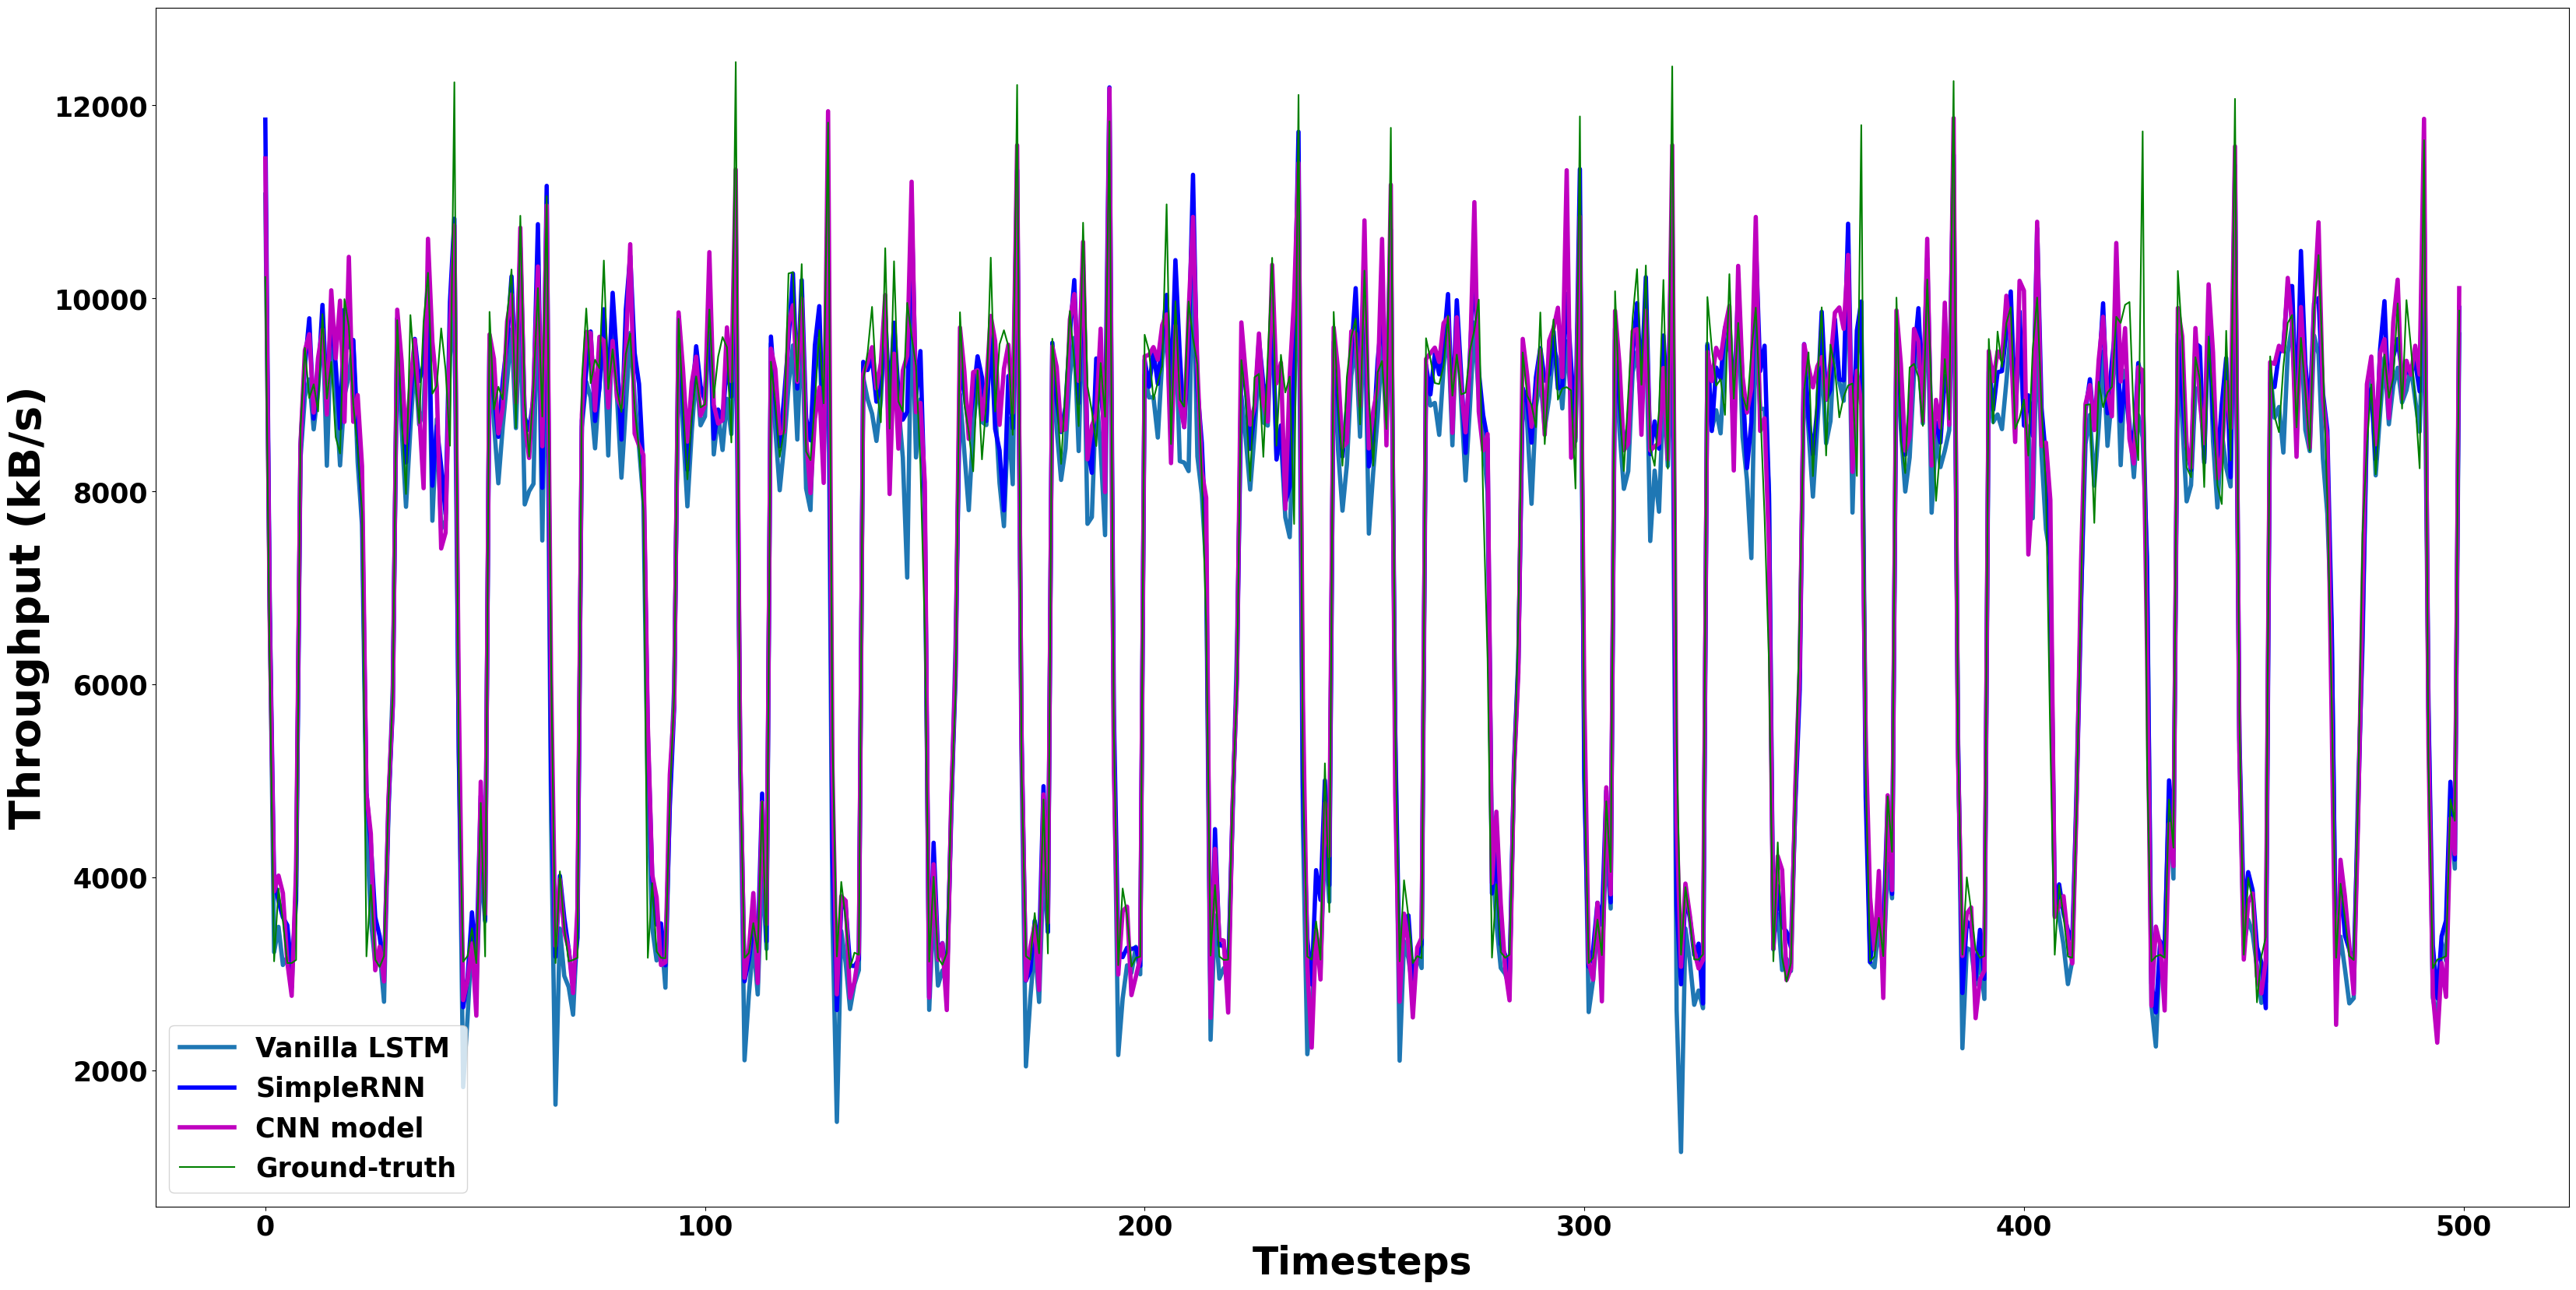

In [33]:
timesteps = 500
plt.rcParams["figure.figsize"] = (40,20)
plt.rcParams.update({'font.size': 25, 'font.weight' : 'bold'})
plt.plot(vanilla_result[0:timesteps], label = "Vanilla LSTM",linewidth=4)
plt.plot(simple_rnn_result[0:timesteps], label = "SimpleRNN",linewidth=4, color='b')
plt.plot(cnn_result[0:timesteps], label = "CNN model",linewidth=4, color='m')
plt.plot(true_testY[0:timesteps], label = "Ground-truth", color = 'g')
plt.xlabel('Timesteps', fontweight='bold', fontsize=35)
plt.ylabel('Throughput (kB/s)', fontweight='bold', fontsize = 40)
plt.legend()

# Calculate RMSE

In [34]:
vanil_temp = 0
simple_temp = 0
cnn_temp = 0

for i in range(len(testY)):
    vanil_temp += (testY[i] - vanilla_predict[i])**2
    simple_temp += (testY[i] - simple_rnn_predict[i])**2
    cnn_temp += (testY[i] - cnn_predict[i])**2

v_rmse = math.sqrt(vanil_temp / len(testY))
s_rmse = math.sqrt(simple_temp / len(testY))
c_rmse = math.sqrt(cnn_temp / len(testY))

<BarContainer object of 3 artists>

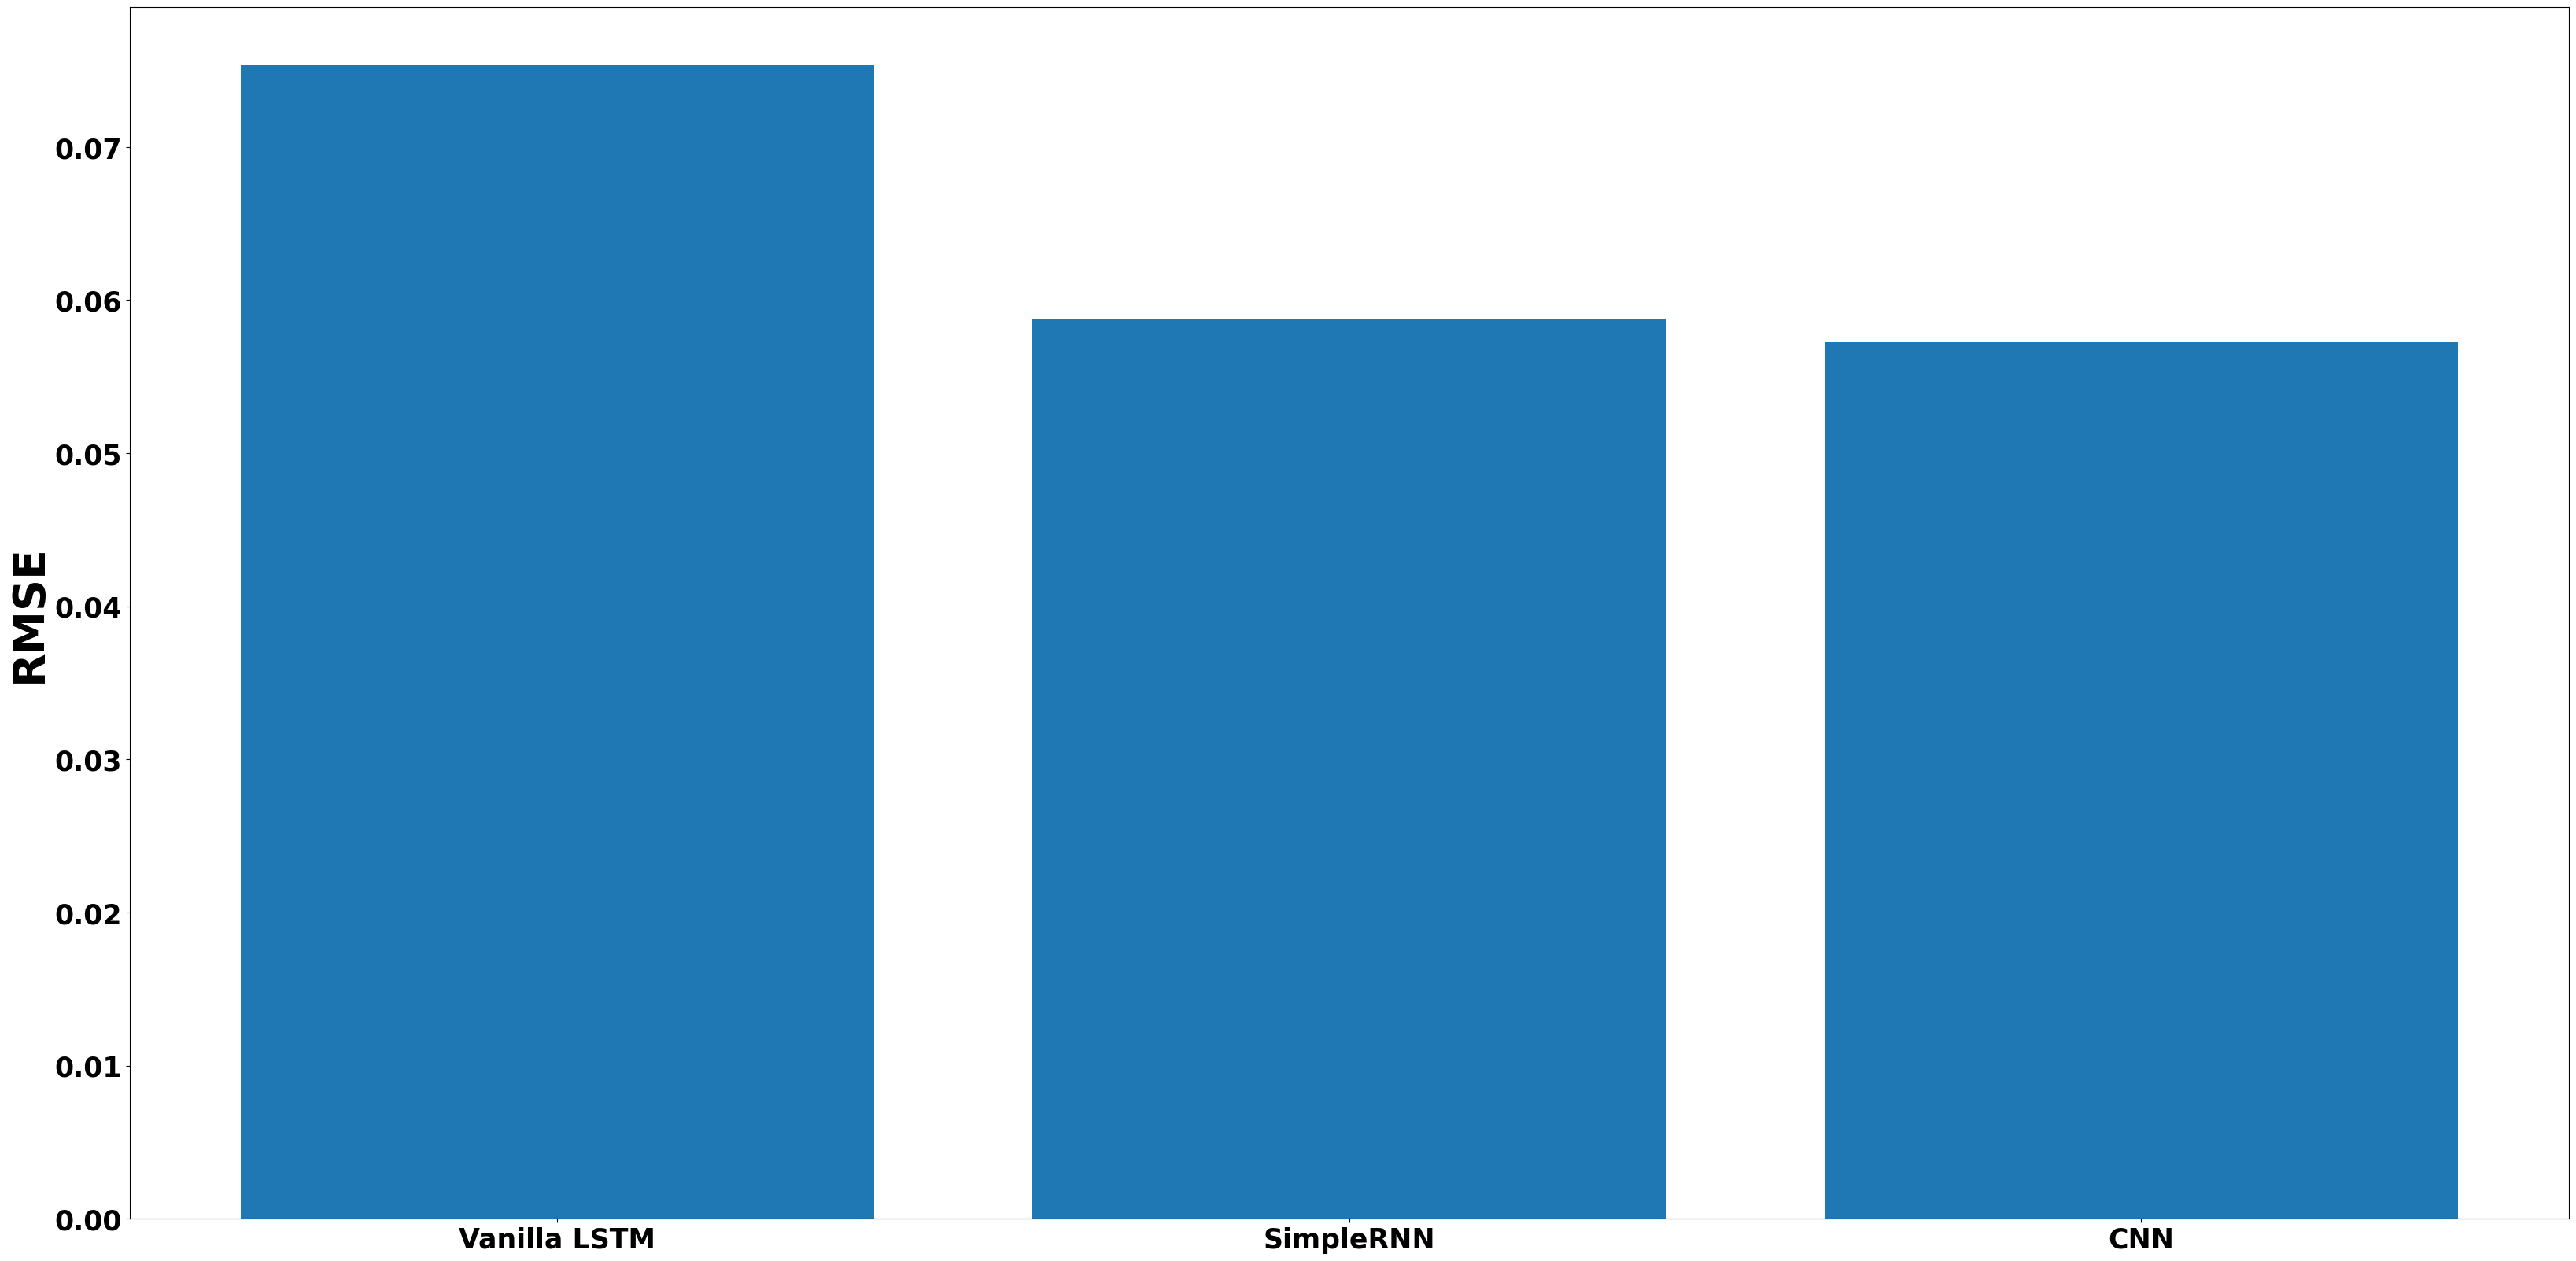

In [35]:
fig = plt.figure()
names = ['Vanilla LSTM', 'SimpleRNN', 'CNN']
values = [v_rmse,s_rmse,c_rmse]
plt.ylabel('RMSE', fontweight='bold',fontsize= 40)
# plt.ylim([0.006,0.0125])
plt.bar(names,values) 